In [6]:
# Naložimo knjižnjice in funkcije
from sage.all import graphs
from metahevristika import simulated_annealing_subpath
import csv
import time
import os
import pandas as pd
import matplotlib.pyplot as plt
from funkcije2 import Ln_graph, build_caterpillar, build_caterpillar2, subpath_number, cubic_graphs, encode_time_hms, build_tree, show_build_tree_tree_layout

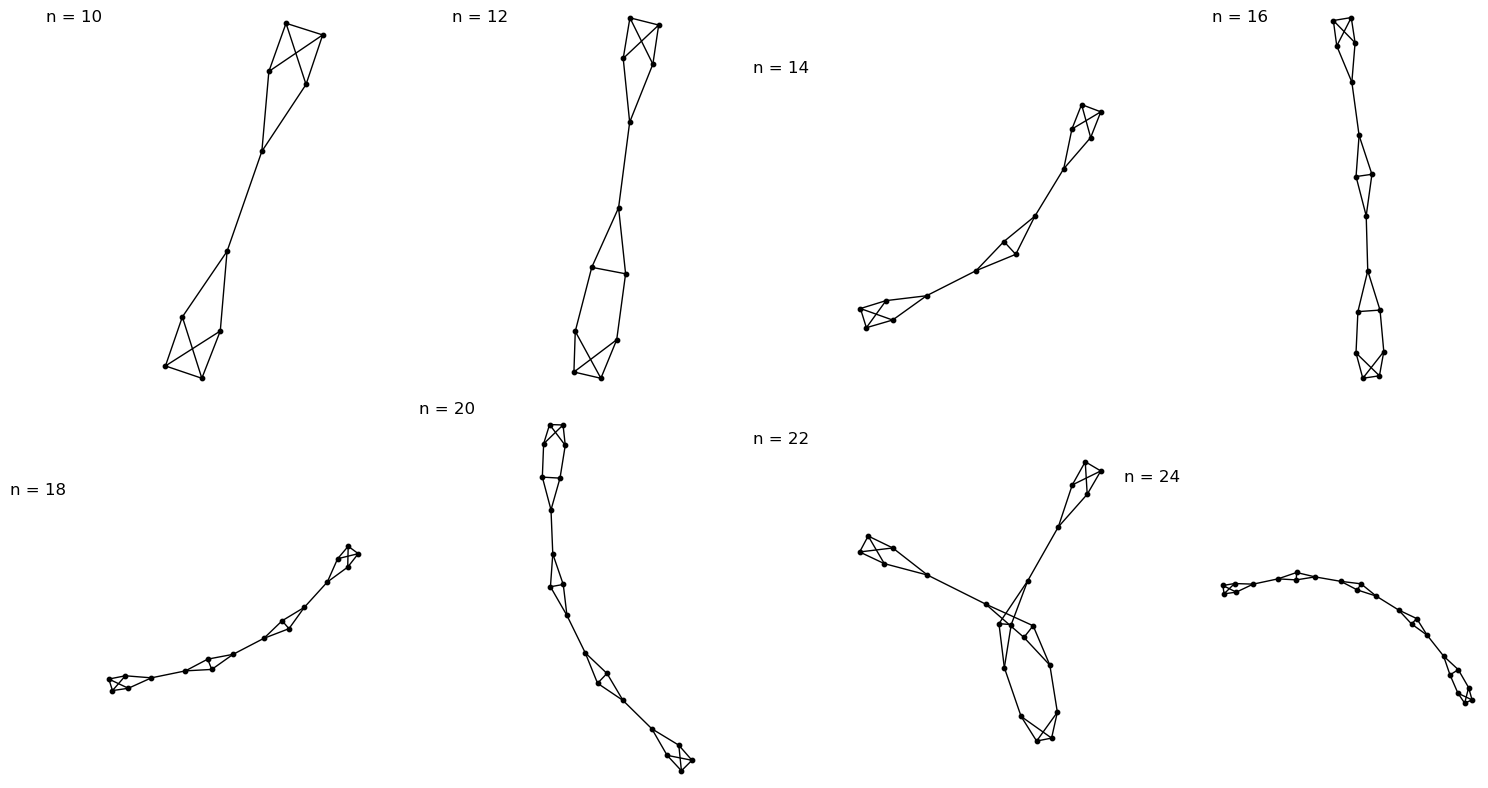

In [2]:
# Preizkusimo funkcijo Ln_graphs

Ln_plots = []
for n in range(10, 27, 2):
    # narisan graf
    Gplot = Ln_graph(n).plot(
        layout="spring",
        vertex_size=10,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=200
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"n = {n}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    Ln_plots.append(Gplot + title)

row1 = Ln_plots[:4]
row2 = Ln_plots[4:8]

GA = graphics_array([row1, row2])
GA.show(figsize=(15, 8), axes=False)

In [ ]:
# Preverimo koliko je vseh kubičnih grafov za vsak n
# NE POGANJAJ ZNOVA: Trajalo je 110min
for n in range(4,23,2):
    c = sum(1 for _ in cubic_graphs(n))
    print(f"n={n} število grafov: {c}")

n=4 število grafov: 1
n=6 število grafov: 2
n=8 število grafov: 5
n=10 število grafov: 19
n=12 število grafov: 85
n=14 število grafov: 509
n=16 število grafov: 4060
n=18 število grafov: 41301
n=20 število grafov: 510489
n=22 število grafov: 7319447


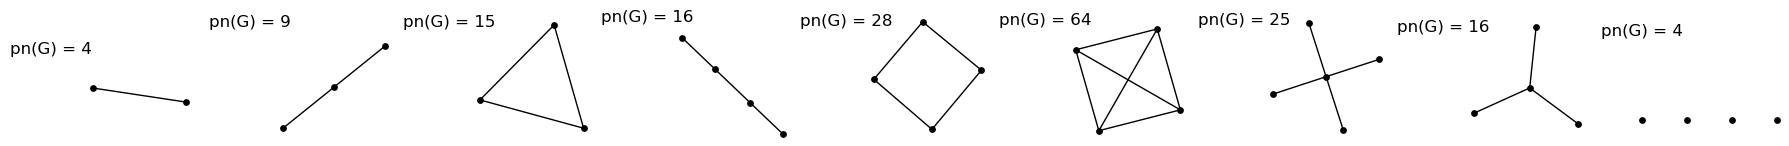

In [3]:
# preverjamo delovanje funkcije subpath_number na enostavnih grafih
graphs_list = [
    # 2. P2: pot s 2 vozlišči
    Graph({0:[1]}),
    # 3. Zvezda S3: center 0, listi 1 in 2
    Graph({0:[1,2]}),
    # 3. C3: trikotnik
    Graph({0:[1,2], 1:[2]}),
    # 4. Potni graf P4
    Graph({0:[1], 1:[2], 2:[3]}),
    # 4. Cikel C4
    Graph({0:[1,3], 1:[2], 2:[3]}),
    # 4. Popoln graf K4
    graphs.CompleteGraph(4),
    # 4. Zvezda S4
    graphs.StarGraph(4),
    # 4. Drevo v obliki črke T
    Graph({0:[1,2,3]}),
    # 4. Diskretni graf na 4 vozliščih
    Graph(4)
]

plots = []
for G in graphs_list:
    # narisan graf
    Gplot = G.plot(
        layout="spring",
        vertex_size=15,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=200
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"pn(G) = {subpath_number(G)}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    plots.append(Gplot + title)

# prikaz v eni vrstici
graphics_array([plots]).show(figsize=(18,3), axes=False)

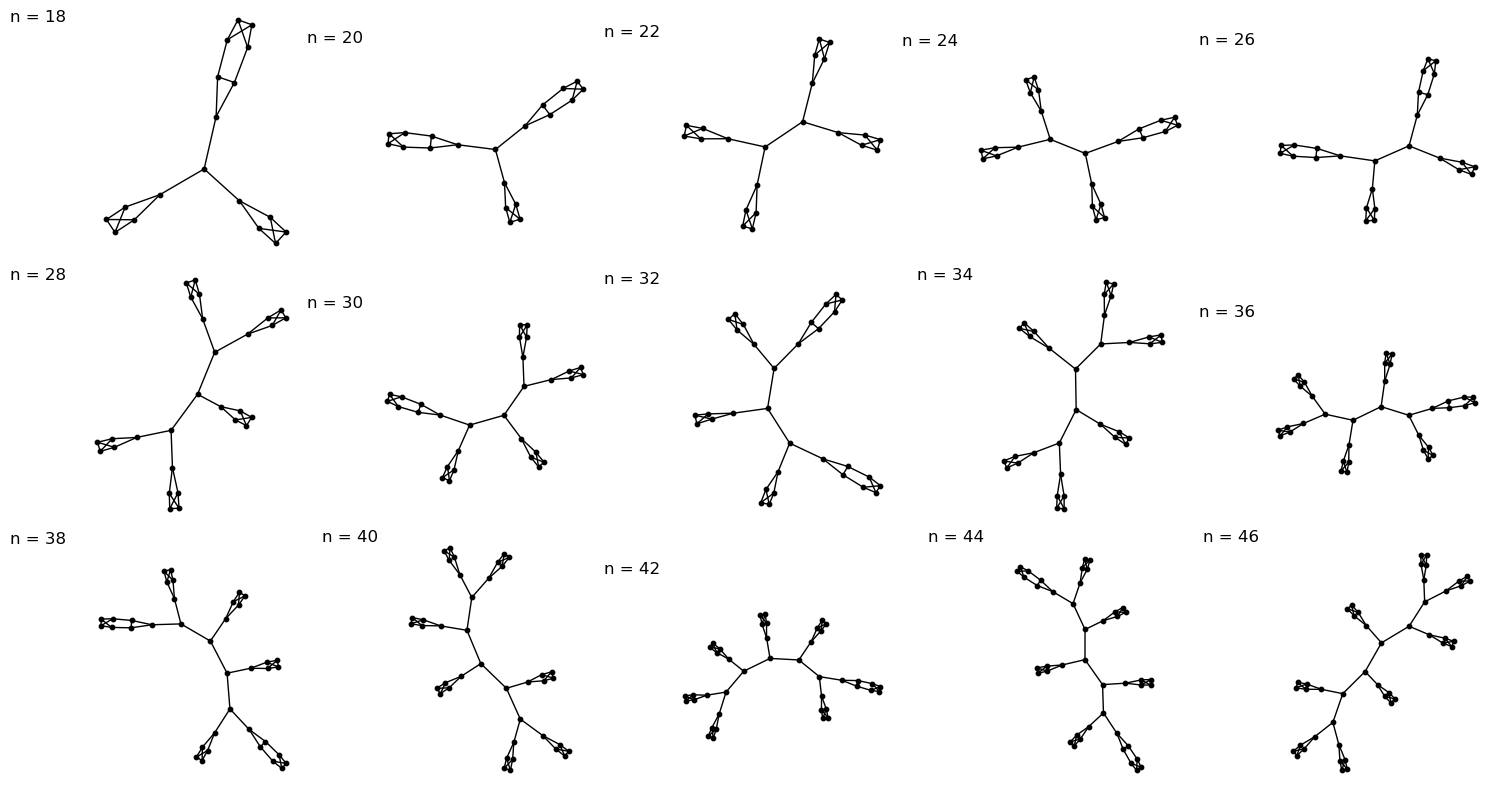

In [6]:
# Preizkusimo funkcijo build_caterpillar

star_plots = []
for n in range(18, 47, 2):
    # narisan graf
    Gplot = build_caterpillar(n).plot(
        layout="spring",
        vertex_size=10,
        vertex_color="black",
        vertex_labels=False,
        edge_thickness=1,
        iterations=400
    )

    # izklopimo osi, da so grafi čisti
    Gplot.axes(False)
    # naslov nad grafom (v relativnih koordinatah figure)
    title = text(
        f"n = {n}",
        (0.5, 1),
        horizontal_alignment='center',
        color='black',
        fontsize=12
    )
    star_plots.append(Gplot + title)

row1 = star_plots[:5]
row2 = star_plots[5:10]
row3 = star_plots[10:15]

GA = graphics_array([row1, row2, row3])
GA.show(figsize=(15, 8), axes=False)

## Prva točka

Tu je cilj preveriti pravilnost trditve za čim večje n, kjer Ln **primerjamo z vsemi možnimi kubičnimi grafi** na n vozliščih

Shranili bomo:

        - CSV boljših grafov od Ln

Za csv n = 16 je trajalo 1,5 min (4060 grafov), za n = 18: 80 min (41301 grafov) -> **za n = 20 je 510489 grafov**

In [10]:
start_time = time.time()

os.makedirs("Data", exist_ok=True)

for n in range(10, 19, 2):
    file_n = os.path.join("Data", f"boljsi_Ln_n{n}.csv")

    # VAROVALO: če datoteka že obstaja, je ne povozi in preskoči n
    if os.path.exists(file_n):
        print(f"Preskok n = {n} | datoteka že obstaja: {file_n}")
        continue
        
    start = time.time()

    # Ustvari/odpri CSV za trenutni n
    with open(file_n, mode="w", newline="") as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(["n", "graph6", "pn(G)", "pn(Ln)", "pn(star)"])

        Ln = Ln_graph(n)
        pn = subpath_number(Ln)
        star = build_catterpillar(n)
        pn2 = subpath_number(star)


        written = 0 

        for G in cubic_graphs(n):
            pnG = subpath_number(G)
            if pnG < pn:
                writer.writerow([n, G.graph6_string(), pnG, pn, pn2])
                written += 1

    elapsed_total = time.time() - start_time
    end = time.time() - start

    print(f"Zaključil n = {n} | datoteka: {file_n} | zapisov: {written+1} | čas n: {encode_time_hms(end)} | skupni: {encode_time_hms(elapsed_total)}")


Preskok n = 10 | datoteka že obstaja: Data/boljsi_Ln_n10.csv
Preskok n = 12 | datoteka že obstaja: Data/boljsi_Ln_n12.csv
Preskok n = 14 | datoteka že obstaja: Data/boljsi_Ln_n14.csv
Preskok n = 16 | datoteka že obstaja: Data/boljsi_Ln_n16.csv
Preskok n = 18 | datoteka že obstaja: Data/boljsi_Ln_n18.csv


In [8]:
folder = "Data"
dfs = []

for file in os.listdir(folder):
    if file.lower().endswith(".csv"):
        path = os.path.join(folder, file)
        df = pd.read_csv(path)
        df["source_file"] = file  # dodamo informacijo, iz katere datoteke prihaja
        dfs.append(df)

df = pd.concat(dfs, ignore_index=True) if dfs else pd.DataFrame()

In [9]:
df_f = df[df["n"] == 18].copy()
df_f = df_f.sort_values("pn(G)")
df_min3 = df_f.head(int(3))
slov = dict(zip(df_min3["graph6"], df_min3["pn(G)"]))

for G6, pn in slov.items():
    G = Graph(G6)
    print(pn)

7072
7296
7380


## Simulated annealing

Korak 0, T=29.9910, E=27528, best_E=27528
Korak 2200, T=15.4994, E=27528, best_E=27528
Korak 4400, T=8.0101, E=27528, best_E=27528
Korak 6600, T=4.1396, E=27528, best_E=27528
Korak 8800, T=2.1393, E=27528, best_E=27528
Korak 11000, T=1.1056, E=27528, best_E=27528
Korak 13200, T=0.5714, E=27528, best_E=27528
Korak 15400, T=0.2953, E=27528, best_E=27528
Korak 17600, T=0.1526, E=27528, best_E=27528
Korak 19800, T=0.0789, E=27528, best_E=27528
Zaključil n = 32 v času 00:18:53.923 | Best_E = 27528
Graf je boljši


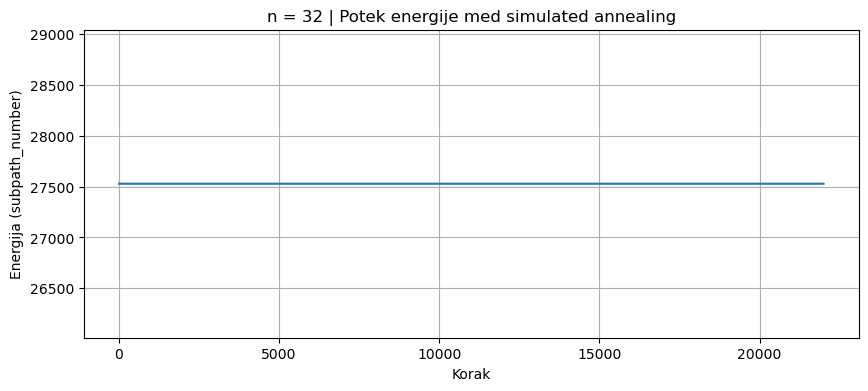

In [19]:
for n in range(32, 33, 2):
    Ln = build_tree(n)  # ali build_caterpillar2(n)

    start = time.time()
    best_G, best_E, history = simulated_annealing_subpath(
        Ln,
        steps=22000,
        T0=30.0,
        alpha=0.9997,
        max_tries = 2000,
        verbose=True
    )
    elapsed = time.time() - start
    print(f"Zaključil n = {n} v času {encode_time_hms(elapsed)} | Best_E = {best_E}")
    if best_E <= subpath_number(Ln):
        print("Graf je boljši")

    plt.figure(figsize=(10, 4))
    plt.plot(history)
    plt.xlabel("Korak")
    plt.ylabel("Energija (subpath_number)")
    plt.title(f"n = {n} | Potek energije med simulated annealing")
    plt.grid(True)
    plt.show()


Zaključil n = 10, 0. ponovitev v času 00:00:08.687 | Best_E = 1276
Zaključil n = 10, 1. ponovitev v času 00:00:09.828 | Best_E = 1276
Zaključil n = 10, 2. ponovitev v času 00:00:08.865 | Best_E = 1276


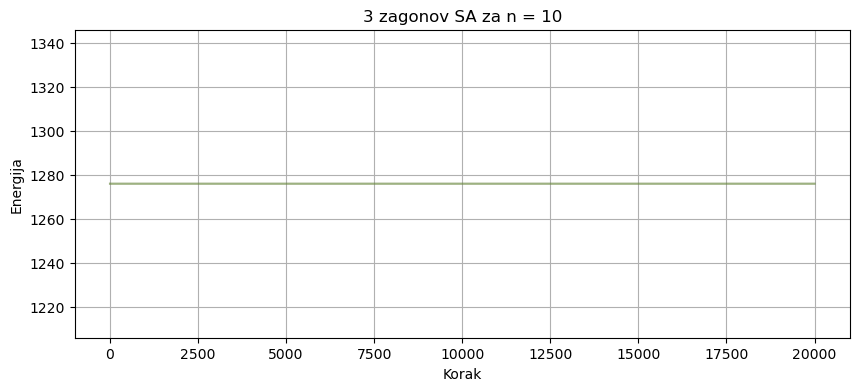

Zaključil n = 12, 0. ponovitev v času 00:00:18.290 | Best_E = 3076
Zaključil n = 12, 1. ponovitev v času 00:00:19.784 | Best_E = 3076
Zaključil n = 12, 2. ponovitev v času 00:00:19.736 | Best_E = 3076


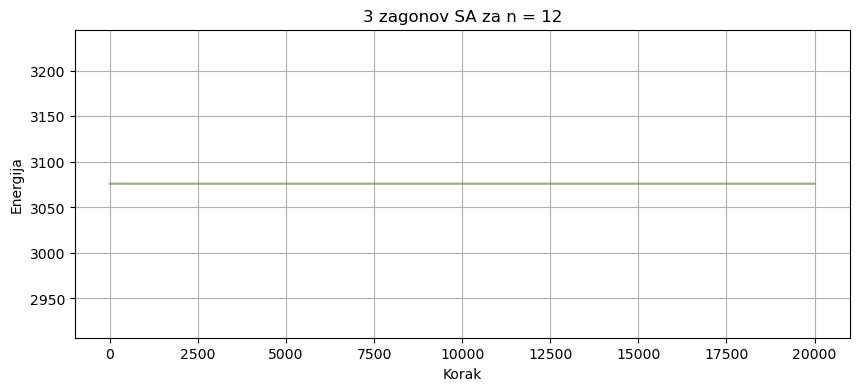

Zaključil n = 14, 0. ponovitev v času 00:00:32.805 | Best_E = 5504
Zaključil n = 14, 1. ponovitev v času 00:00:33.143 | Best_E = 5504
Zaključil n = 14, 2. ponovitev v času 00:00:33.062 | Best_E = 5504


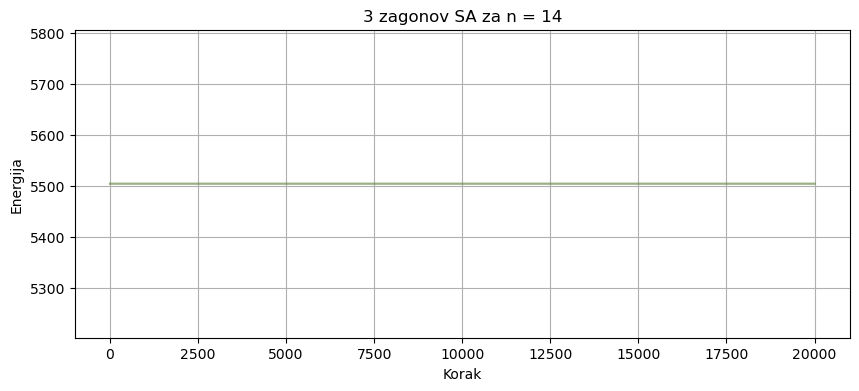

Zaključil n = 16, 0. ponovitev v času 00:00:52.177 | Best_E = 3640
Zaključil n = 16, 1. ponovitev v času 00:00:54.466 | Best_E = 3640
Zaključil n = 16, 2. ponovitev v času 00:00:52.510 | Best_E = 3640


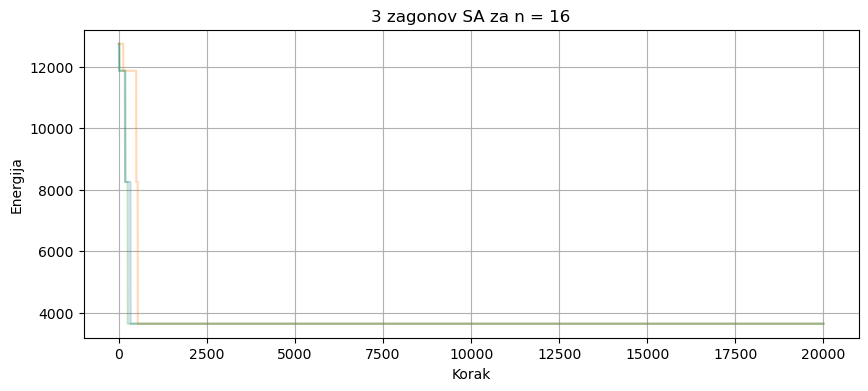

Zaključil n = 18, 0. ponovitev v času 00:01:43.540 | Best_E = 7072
Zaključil n = 18, 1. ponovitev v času 00:01:45.833 | Best_E = 7072
Zaključil n = 18, 2. ponovitev v času 00:01:39.922 | Best_E = 7380


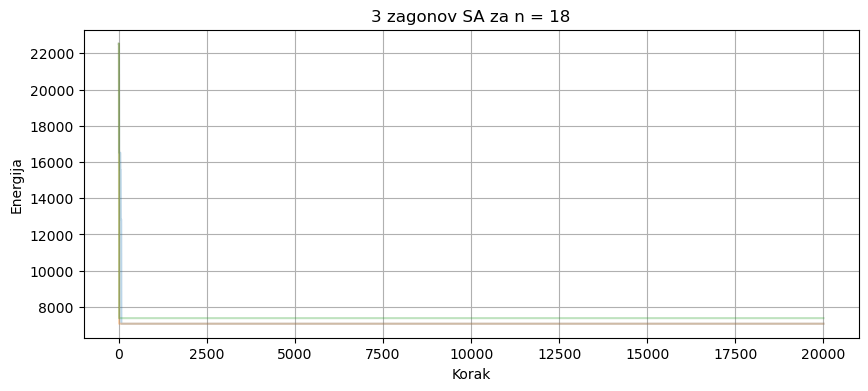

Zaključil n = 20, 0. ponovitev v času 00:03:31.968 | Best_E = 12816
Zaključil n = 20, 1. ponovitev v času 00:02:36.031 | Best_E = 11708
Zaključil n = 20, 2. ponovitev v času 00:03:19.838 | Best_E = 14212


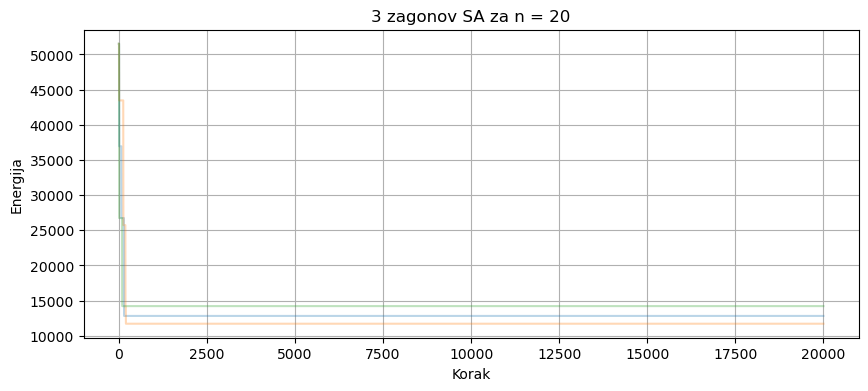

Zaključil n = 22, 0. ponovitev v času 00:05:11.341 | Best_E = 20580
Zaključil n = 22, 1. ponovitev v času 00:02:23.943 | Best_E = 7156
Zaključil n = 22, 2. ponovitev v času 00:05:04.194 | Best_E = 20580


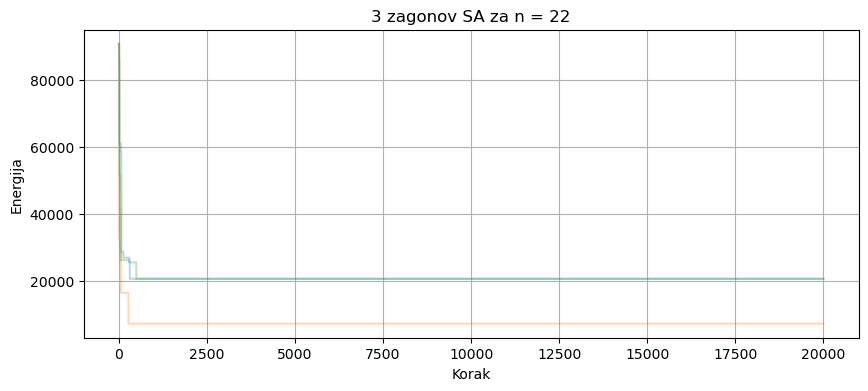

Zaključil n = 24, 0. ponovitev v času 00:04:34.537 | Best_E = 12220
Zaključil n = 24, 1. ponovitev v času 00:05:04.315 | Best_E = 12220
Zaključil n = 24, 2. ponovitev v času 00:04:41.025 | Best_E = 12220


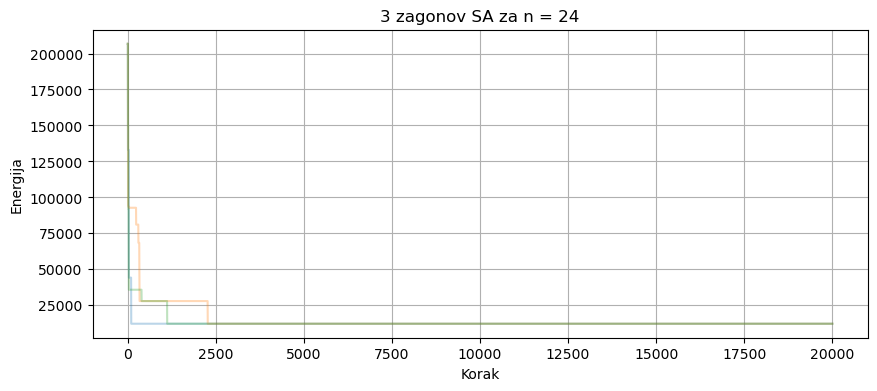

Zaključil n = 26, 0. ponovitev v času 00:08:03.016 | Best_E = 21760
Zaključil n = 26, 1. ponovitev v času 00:14:28.553 | Best_E = 46888
Zaključil n = 26, 2. ponovitev v času 00:06:56.713 | Best_E = 19064


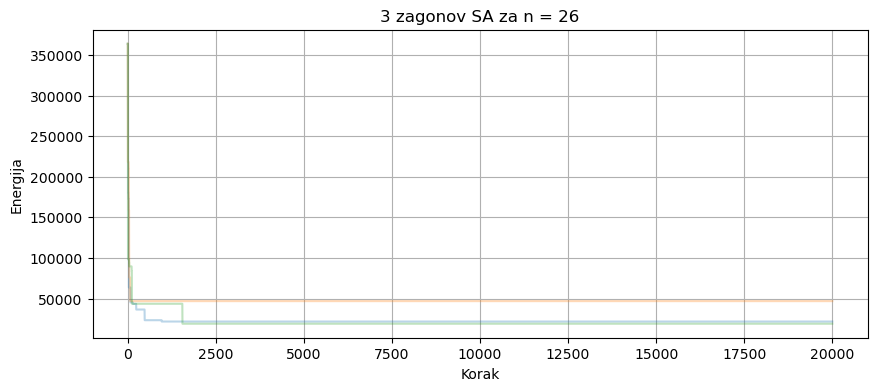

KeyboardInterrupt: 

In [26]:
k = 3
naj_grafi = []
for n in range(10, 37,2):
    najG = []
    all_histories = []
    for i in range(k):
        Ln = Ln_graph(n)

        start = time.time()
        best_G, best_E, history = simulated_annealing_subpath(
        Ln,
        steps=20000,
        T0=30.0,
        alpha=0.99955,
        max_tries = 1500,
        verbose=False
        )
        elapsed = time.time() - start
        print(f"Zaključil n = {n}, {i}. ponovitev v času {encode_time_hms(elapsed)} | Best_E = {best_E}")
        all_histories.append(history)
        najG.append(best_G)

    naj_grafi.append(najG)

    plt.figure(figsize=(10, 4))
    for hist in all_histories:
        plt.plot(hist, alpha=0.3)  # malo prosojno
    plt.xlabel("Korak")
    plt.ylabel("Energija")
    plt.title(f"{k} zagonov SA za n = {n}")
    plt.grid(True)
    plt.show()

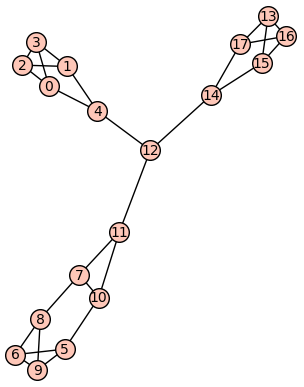

In [24]:
for G in naj_grafi:
    G.show()

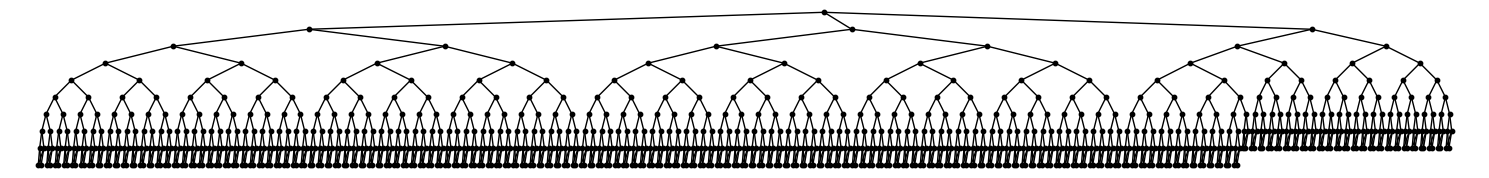

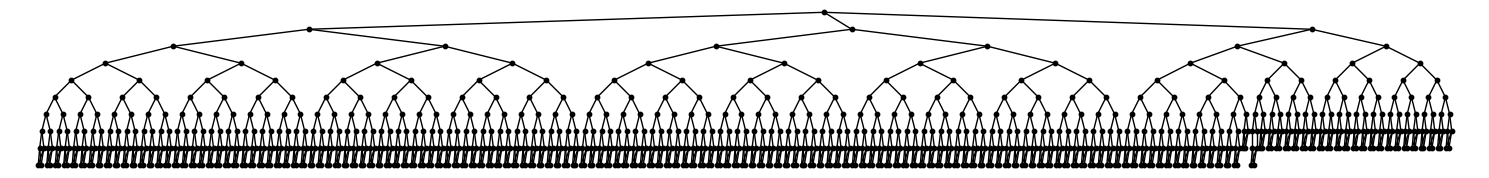

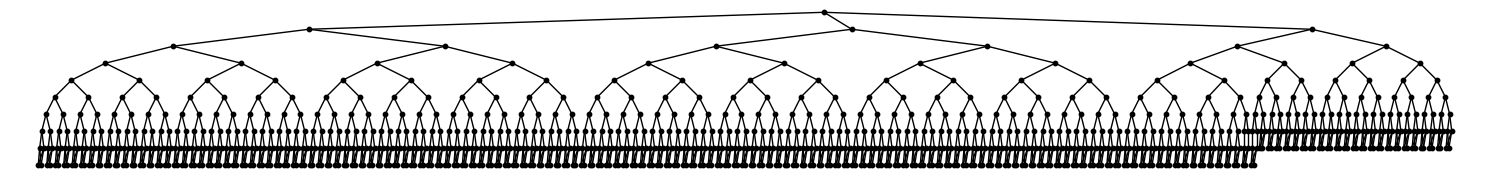

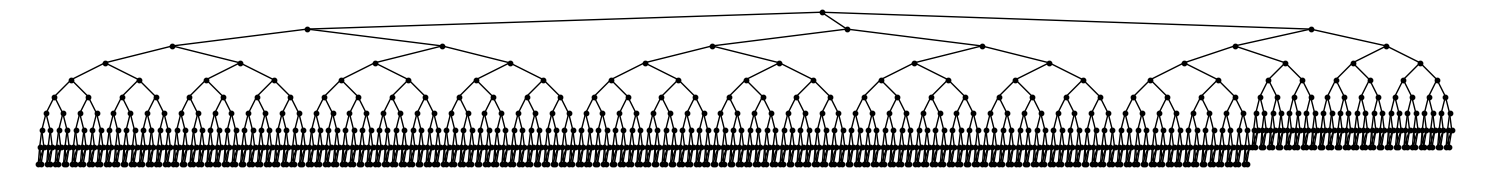

In [5]:
for n in range(1000, 1007, 2):
    show_build_tree_tree_layout(n, root=0, figsize=[15,15])

In [ ]:
for n in range(16, 201, 2):
    G = build_tree(n)
    H = build_caterpillar(n)
    pnG = subpath_number(G)
    pnH = subpath_number(H)

    if pnG != pnH:
        print(f"n = {n} | pn(Tree) = {pnG} | pn(Star) = {pnH}")

In [7]:
n = 12

Ln = Ln_graph(n)  # ali build_caterpillar2(n)
start = time.time()
best_G, best_E, history = simulated_annealing_subpath(
    Ln,
    steps=20000,
    T0=1000.0,
    alpha=0.9998,
    max_tries = 1000,
    T_end_target=1,
    verbose=True
)
elapsed = time.time() - start
print(f"Zaključil n = {n} v času {encode_time_hms(elapsed)} | Best_E = {best_E}")
if best_E <= subpath_number(Ln):
    print("Graf je boljši")

plt.figure(figsize=(10, 4))
plt.plot(history)
plt.xlabel("Korak")
plt.ylabel("Energija (subpath_number)")
plt.title(f"n = {n} | Potek energije med simulated annealing")
plt.grid(True)
plt.show()


[AUTO] mean_dE=536.54, T0=774.06, T_end=50.00, alpha=0.999863
Korak 2000, T=588.5632, E=3076, best_E=3076, sprejetih slabših = 934/1407 (66.38 %)
Korak 4000, T=447.5203, E=3204, best_E=3076, sprejetih slabših = 688/1520 (45.26 %)
Korak 6000, T=340.2769, E=3204, best_E=3076, sprejetih slabših = 583/1570 (37.13 %)
Korak 8000, T=258.7332, E=3204, best_E=3076, sprejetih slabših = 450/1642 (27.41 %)


KeyboardInterrupt: 